# 1. Introduction

In this project, we aim to analyse various factors such as age, gender, and attributes to understand their correlation with diabetes. The dataset will be explored using visualisation and other analysis techniques.
We will also employ machine learning models, including Logistic Regression, Random Forest, and Decision Tree to predict whether an individual is likely to have diabetes.

# 2. Data Description

From here, we will start reading the data. First of all, we import all modules we need.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

## 2.1 Read Dataset

In [7]:
# Get current wd
current_working_directory = os.getcwd()
path = current_working_directory

data = path + '\diabetes_data.csv'

data

'D:\\Python\\Data Analysis\\diabetes_data.csv'

In [8]:
df = pd.read_csv(data)

df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,27.32,6.2,90,0
99996,Female,2.0,0,0,17.37,6.5,100,0
99997,Male,66.0,0,0,27.83,5.7,155,0
99998,Female,24.0,0,0,35.42,4.0,100,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 6.1+ MB


In [10]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

No missing values Found

## 2.2 Clean Up Data Format

As we can see, the "gender" column is string type, which is not convineint for statistical analysis. We would like to transform it to a integer type.

In [14]:
gender_counts = df['gender'].value_counts()

gender_counts

gender
Female    58552
Male      41448
Name: count, dtype: int64

In [15]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}) #convert Male to 0, Female to 1

df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,25.19,6.6,140,0
1,1,54.0,0,0,27.32,6.6,80,0
2,0,28.0,0,0,27.32,5.7,158,0
3,1,36.0,0,0,23.45,5.0,155,0
4,0,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,1,80.0,0,0,27.32,6.2,90,0
99996,1,2.0,0,0,17.37,6.5,100,0
99997,0,66.0,0,0,27.83,5.7,155,0
99998,1,24.0,0,0,35.42,4.0,100,0


## 2.3 Some Basic Description

In [17]:
df.describe()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.585520,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,0.492635,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,1.000000,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,1.000000,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## 2.4 Standard Deviation

In [19]:
df.var()

gender                    0.242689
age                     507.008078
hypertension              0.069248
heart_disease             0.037866
bmi                      44.046894
HbA1c_level               1.146339
blood_glucose_level    1657.152341
diabetes                  0.077776
dtype: float64

# 3. Data Visualization

## 3.1 Histplot of attributes

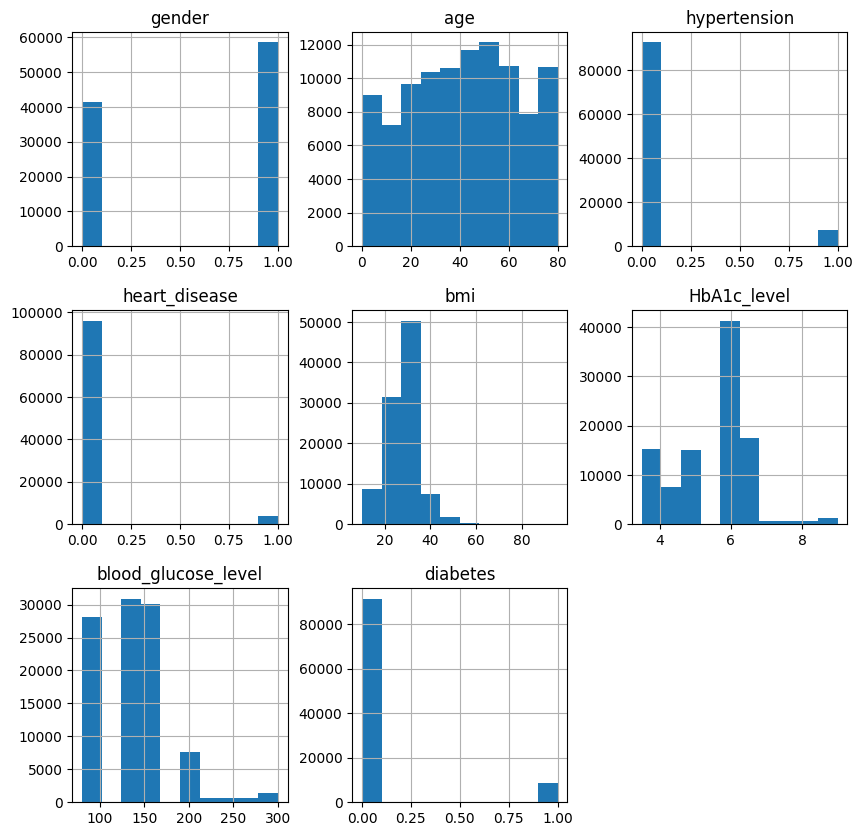

In [22]:
df.hist(figsize = (10,10))
plt.show()

## 3.2 Pairplot of attributes

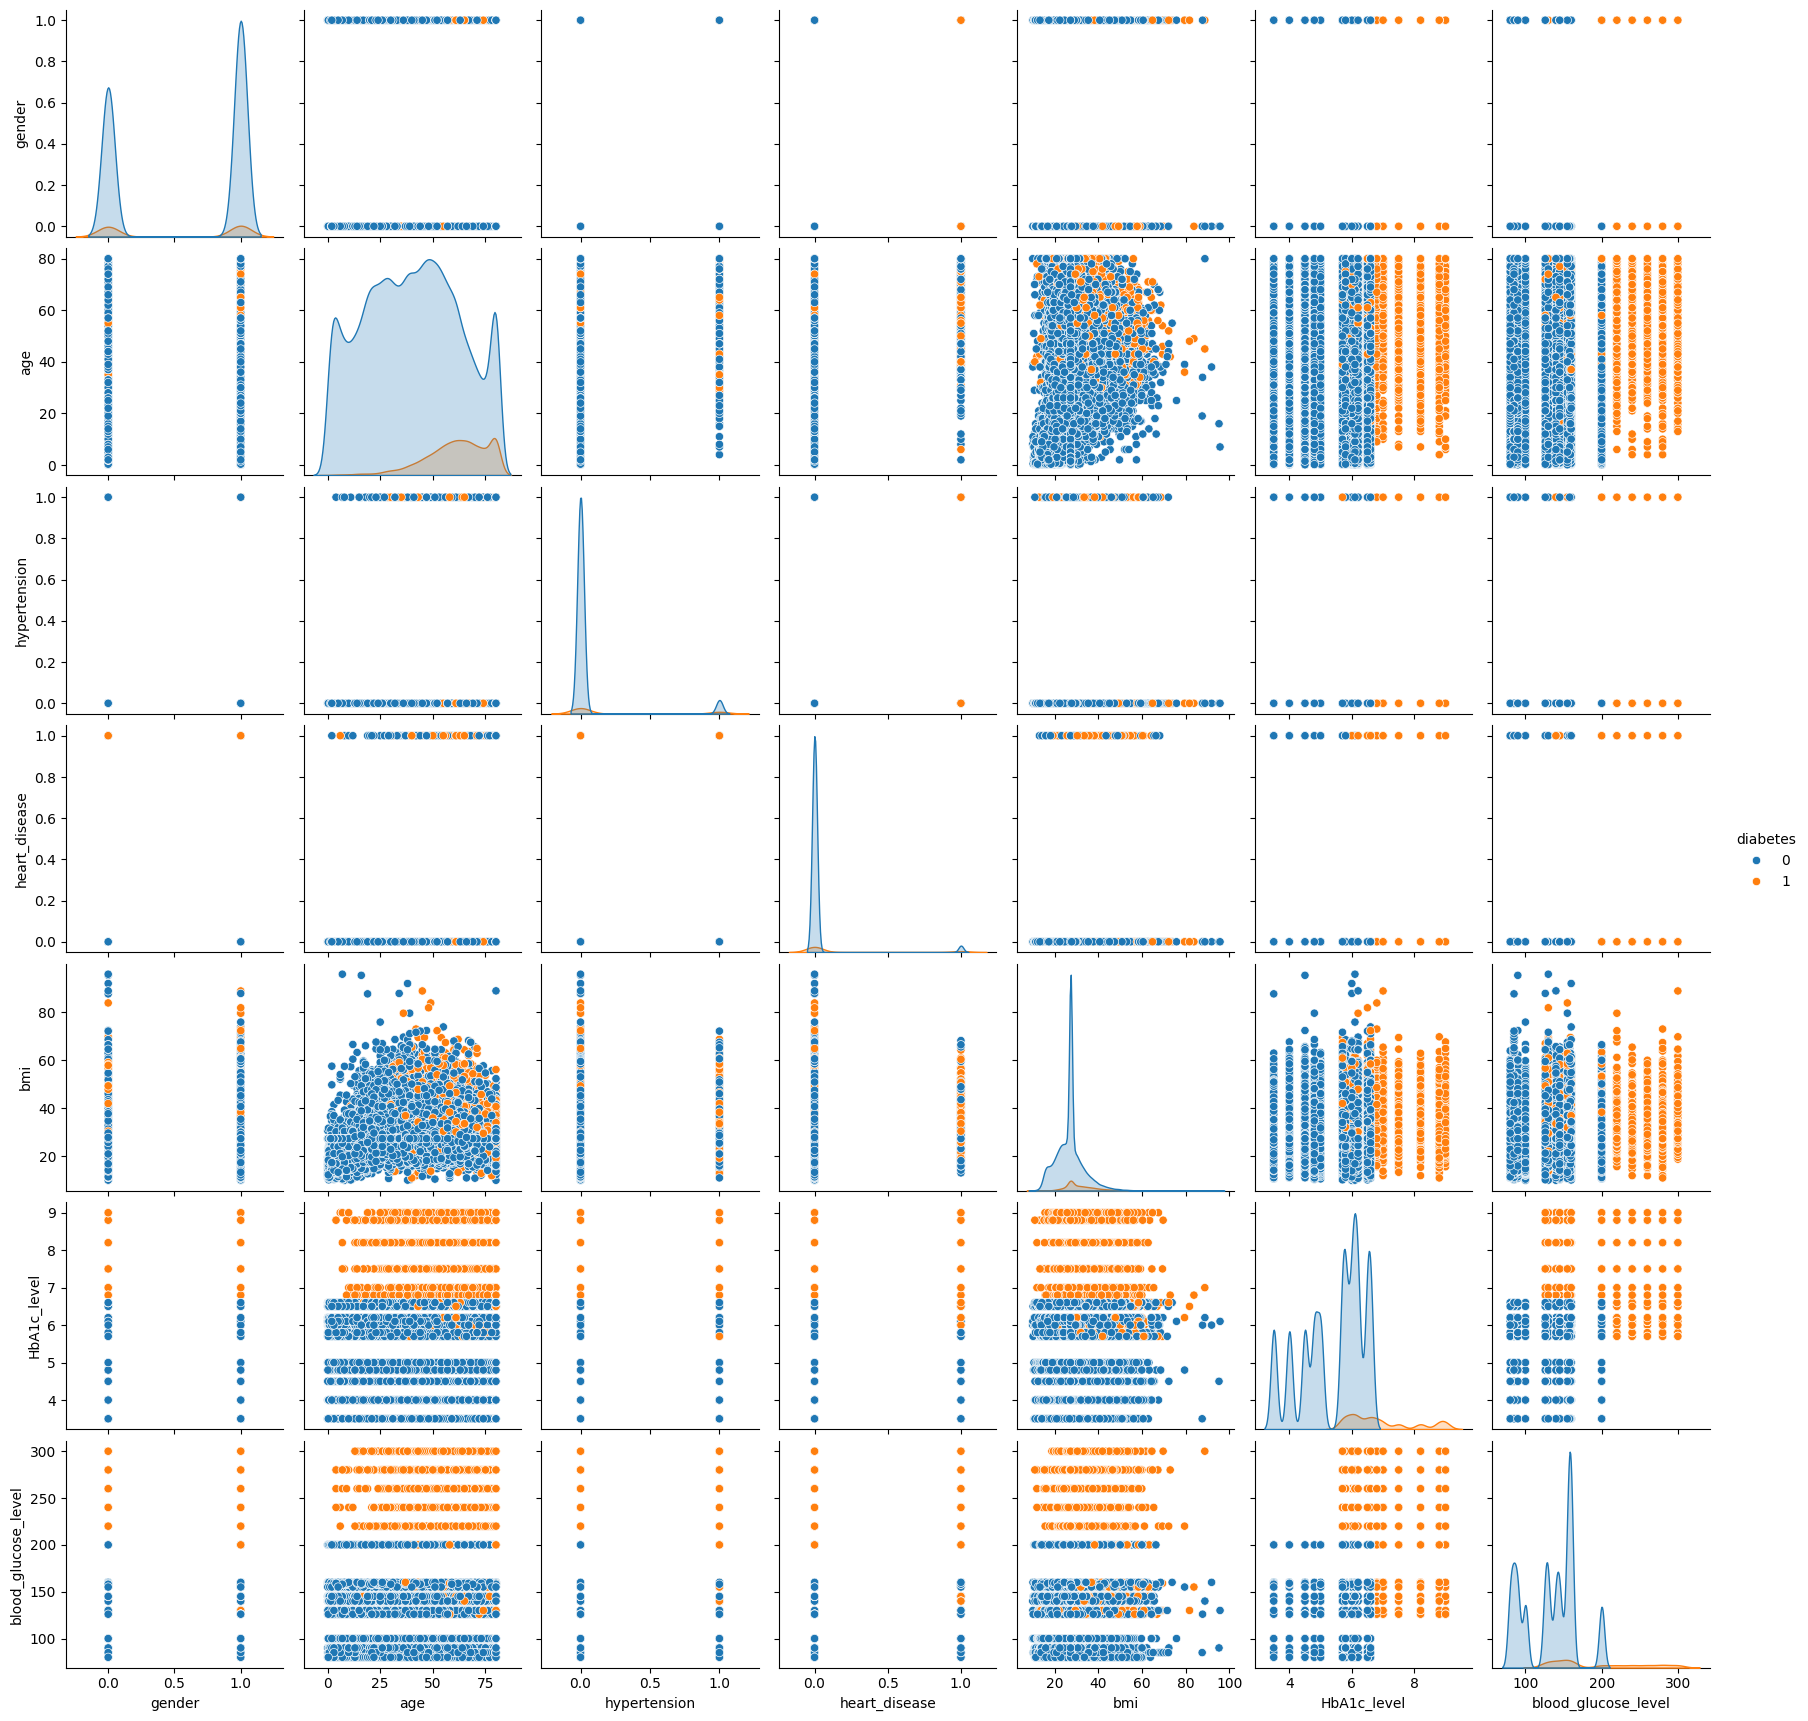

In [24]:
sns.pairplot(data = df, hue='diabetes')
plt.show()

## 3.3 Correlation between attributes

In [26]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

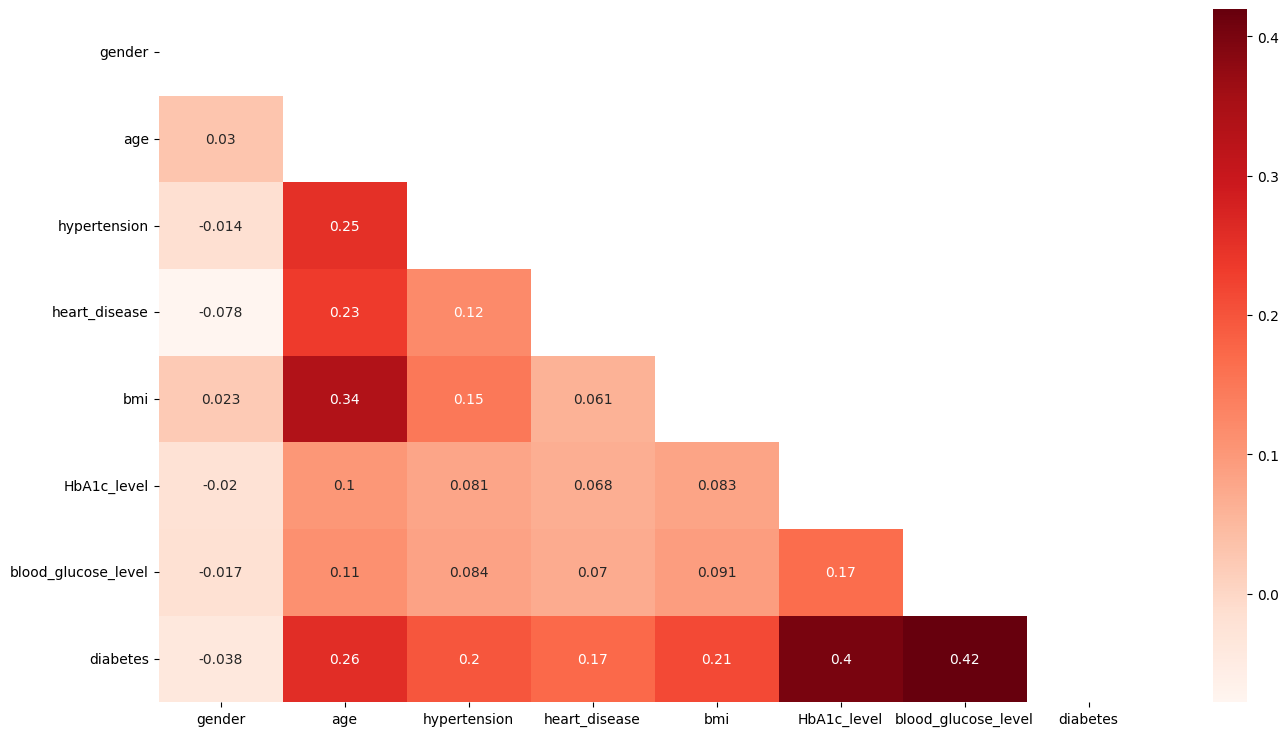

In [27]:
matrix = np.triu(corr_matrix)
plt.figure(figsize=(16,9))
sns.heatmap(corr_matrix, annot=True, mask=matrix, cmap="Reds");

## 4. Data Preprocessing

Next, we will move on to the machine learning section.
We will preprocess the dataset by splitting it into a training set and a test set, allowing us to train the model in the following steps.

### 4.1 Splitting data for the training

In [31]:
from sklearn.model_selection import train_test_split

X = df.select_dtypes(include=['number']).drop('diabetes', axis=1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
X_train.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
10382,1,2.0,0,0,16.45,6.2,159
73171,1,55.0,0,0,24.59,6.0,130
30938,1,24.0,0,0,21.77,4.5,130
99310,0,30.0,0,0,27.32,6.2,159
58959,0,13.0,0,0,18.37,6.5,130


In [33]:
len(X_train)

80000

## 5. Machine Learning models

### 5.1 Logistic Regression

Logistic Regression is a classification method that predicts the probability of an instance belonging to a class using the **sigmoid function**. It outputs a value between 0 and 1, which is then used for classification. Since it is sensitive to feature scaling, we will need to **standardise** the data to improve accuracy and model performance.

In [37]:
#Standardised the Data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [38]:
X_train_std

array([[ 8.41132856e-01, -1.77286554e+00, -2.83591372e-01, ...,
        -1.63680432e+00,  6.28047693e-01,  5.17744967e-01],
       [ 8.41132856e-01,  5.80603115e-01, -2.83591372e-01, ...,
        -4.13134567e-01,  4.41305544e-01, -1.95692520e-01],
       [ 8.41132856e-01, -7.95954023e-01, -2.83591372e-01, ...,
        -8.37059469e-01, -9.59260571e-01, -1.95692520e-01],
       ...,
       [-1.18887283e+00,  1.06905887e+00, -2.83591372e-01, ...,
         2.08832301e+00,  3.24243778e+00,  1.73326870e-01],
       [ 8.41132856e-01, -2.18688126e-01, -2.83591372e-01, ...,
         4.27198839e-01,  2.54563396e-01, -1.17974423e+00],
       [ 8.41132856e-01,  4.47387908e-01, -2.83591372e-01, ...,
        -2.73918249e-03, -9.59260571e-01,  4.93143675e-01]])

In [39]:
y_train

10382    0
73171    0
30938    0
99310    0
58959    0
        ..
21243    0
45891    0
42613    1
43567    0
68268    0
Name: diabetes, Length: 80000, dtype: int64

In [40]:
#Train LR model
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression()

    The model has been trained above, but we will use another function to make predictions and evaluate how accurate our model is.

Accuracy: 96.02%
Accuracy: 96.00%


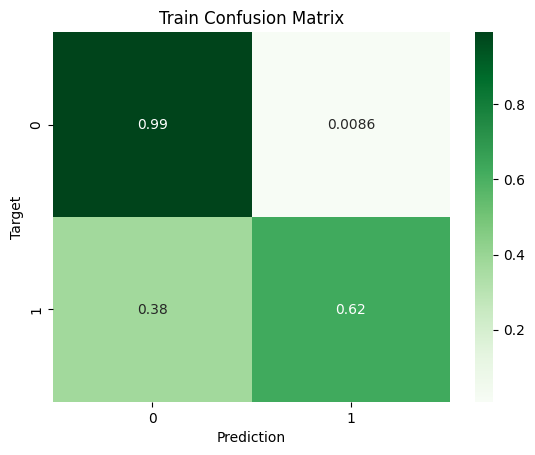

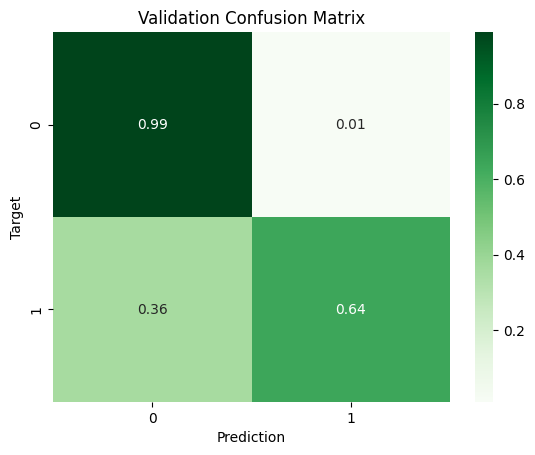

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def predict_and_plot(model, inputs, targets, name):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap="Greens")
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    
    return preds

# Predict and plot on the training data
train_preds = predict_and_plot(lr, X_train_std, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(lr, X_test_std, y_test, 'Validation')

**Evaluate: Logistic Regression Model**  
Training Accuracy: 96.02%  
Validation Accuracy: 96.00%  

### 5.2 | Random Forest

Random Forest allows us to build multiple decision trees and combine their results to make better predictions. It works by randomly selecting data samples and features for each tree, reducing overfitting and improving accuracy.

And we can adjust the parameters such as the number of trees or the maximum depth of each tree to get better results.

In [46]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42, n_jobs=2)
forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=2,
                       random_state=42)

    The model has been trained above, but we will use another function to make predictions and evaluate how accurate our model is.

In [48]:
# A quick way to show the score
train_accuracy = forest.score(X_train, y_train)
val_accuracy = forest.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 0.9938625
Validation Accuracy: 0.9693


Accuracy: 99.39%
Accuracy: 96.93%


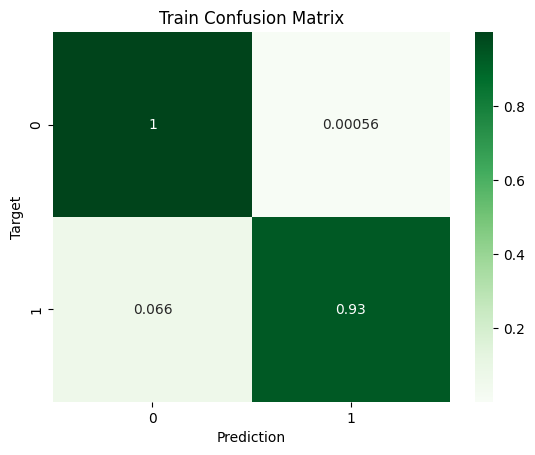

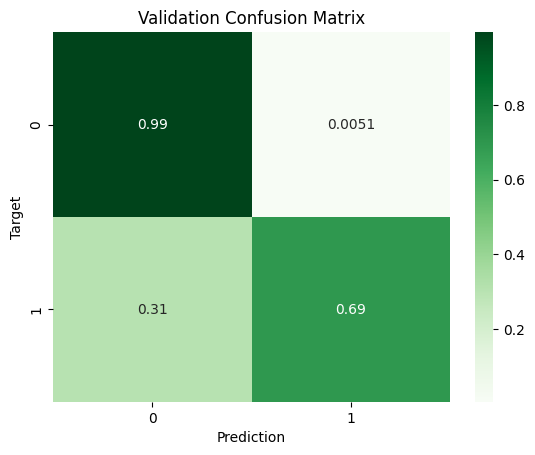

In [49]:
def predict_and_plot(model, inputs,targets, name):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap="Greens")
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    
    return preds

# Predict and plot on the training data
train_preds = predict_and_plot(forest, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(forest, X_test, y_test, 'Validation')

**Evaluate: Random Forest Model**  
Training Accuracy: 99.39%  
Validation Accuracy: 96.93%  

### 5.3 Decision Tree

A Decision Tree splits data based on feature values, aiming to separate classes or predict outcomes. It uses Entropy or Gini impurity to choose the feature that reduces uncertainty the most. Decision trees are suitable for situations where features are obvious.

In [53]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state=42)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [54]:
train_accuracy = dtree.score(X_train, y_train)
val_accuracy = dtree.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 0.971775
Validation Accuracy: 0.97225


Accuracy: 97.18%
Accuracy: 97.22%


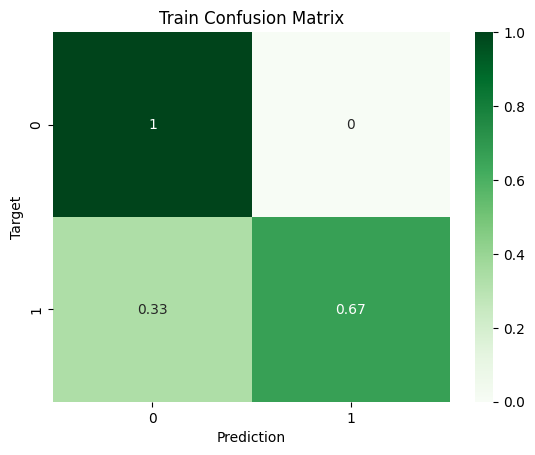

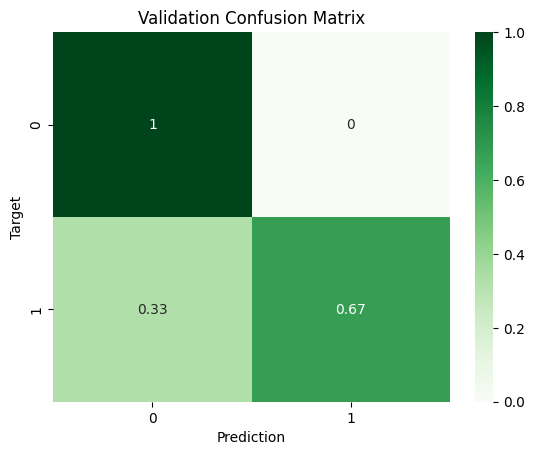

In [55]:
def predict_and_plot(model, inputs,targets, name):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap="Greens")
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    
    return preds

# Predict and plot on the training data
train_preds = predict_and_plot(dtree, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(dtree, X_test, y_test, 'Validation')

**Evaluate: Decision Tree Model**  
Training Accuracy: 97.18%  
Validation Accuracy: 97.22%  

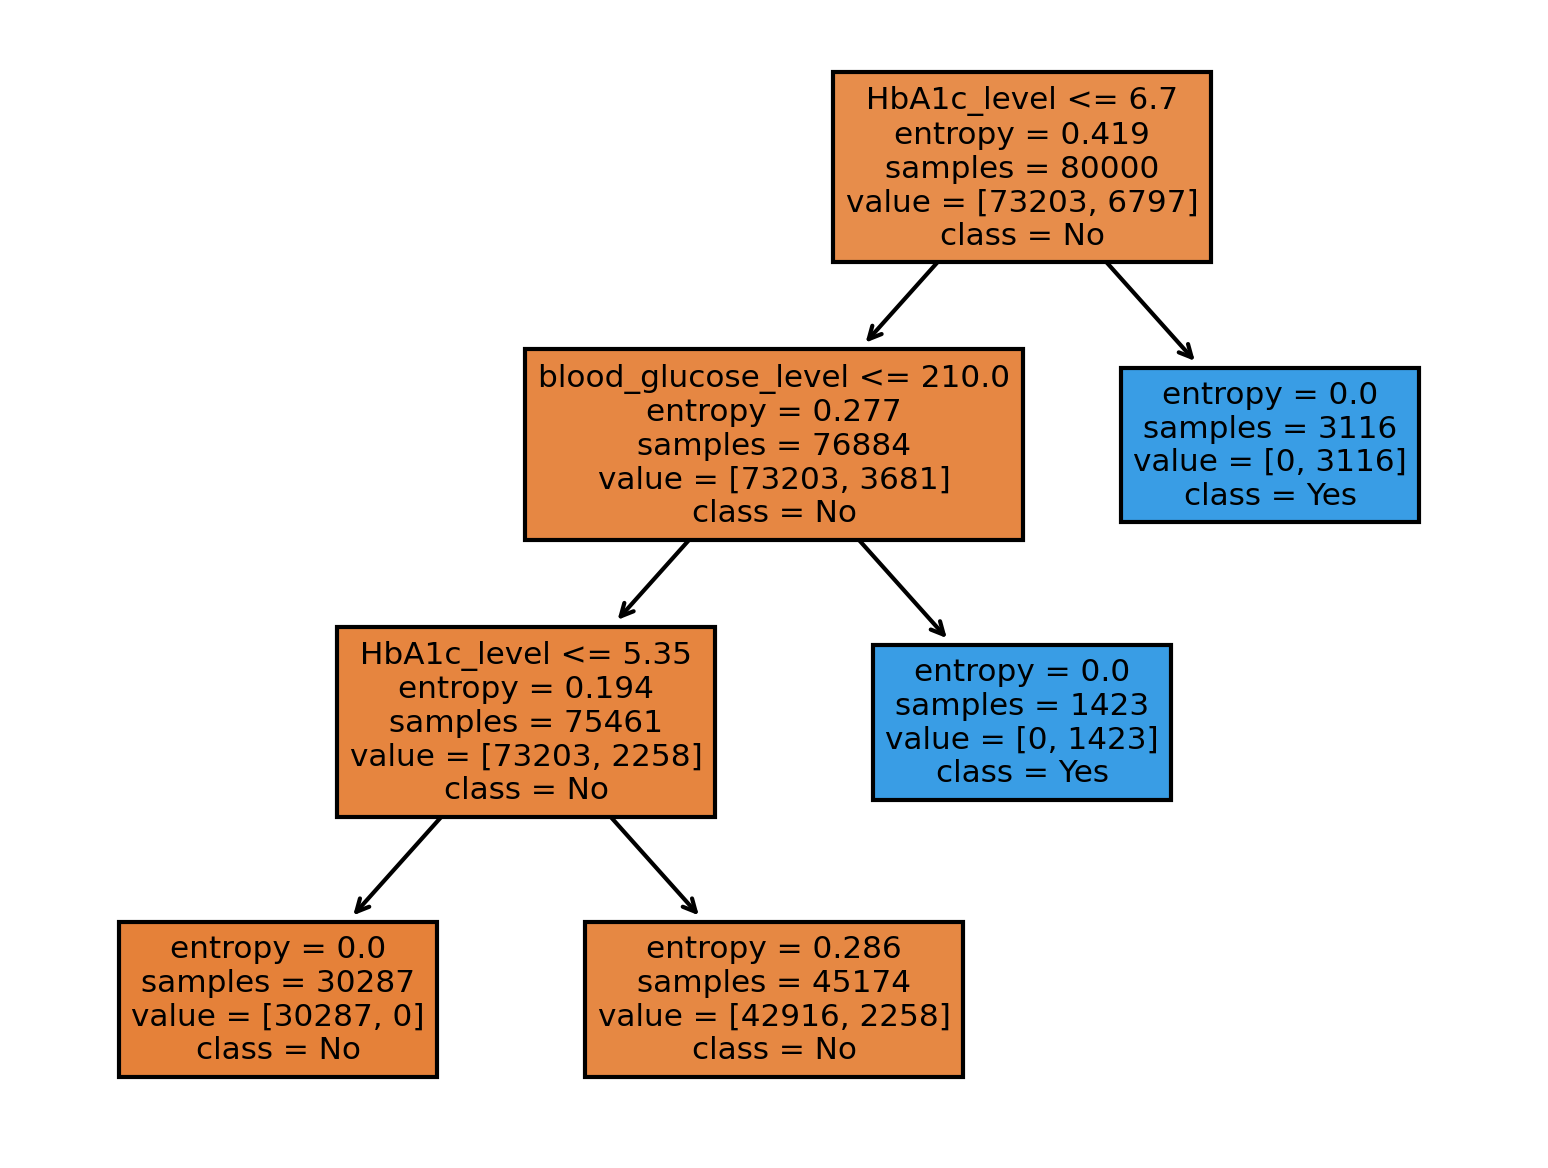

In [57]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(dpi = 300)
tree.plot_tree(dtree,filled=True, feature_names=df.columns.tolist(), class_names=['No', 'Yes'])  
plt.show()

    The decision tree diagram provides a more intuitive way to display results, such as if the HbA1c level is greater than 6.7, it will be predicted as diabetes. This helps us make decisions quickly.